In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras import models, layers
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D

In [3]:
IMAGE_SIZE = 256
BATCH_SIZE = 30
CHANNELS = 3
EPOCHS = 30

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Taro Dataset",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = (BATCH_SIZE))

Found 638 files belonging to 2 classes.


In [5]:
#training split
train_size = 0.8
len(dataset)*train_size

17.6

In [6]:
train_ds = dataset.take(18)
len(train_ds)

18

In [7]:
#test split
test_ds = dataset.skip(18)
len(test_ds)

4

In [8]:
#validation split 10%
val_size = 0.1
len(dataset)*val_size

2.2

In [9]:
val_ds = test_ds.take(2)
len(val_ds)

2

In [10]:
test_ds = test_ds.skip(2)
len(test_ds)

2

In [11]:
def get_dataset_partitions_tf(ds,train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size = 1000):
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
   
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [12]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [13]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [14]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [15]:
data_augmentation = tf.keras.Sequential ([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [16]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

model = keras.Sequential([
   
    #first cnn layer
    keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (input_shape)),
    keras.layers.MaxPooling2D((2,2)),
    
    #second cnn layer
    keras.layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    keras.layers.MaxPooling2D((2,2)),
    
    #third cnn layer
    keras.layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    keras.layers.MaxPooling2D((2,2)),
    
    #fully connected layer
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation = "relu" ),
    keras.layers.Dense(64, activation = "softmax"),
])

model.build(input_shape = input_shape)

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)      

In [18]:
model.compile(
            optimizer = 'adam',
            loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
            metrics = ['accuracy']
            
) 

In [19]:
history = model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/30


C:\Users\Acer\anaconda3\lib\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


17/17 [==============================] - 80s 3s/step - loss: 26.8679 - accuracy: 0.5307 - val_loss: 0.6094 - val_accuracy: 0.7667
Epoch 2/30
17/17 [==============================] - 37s 2s/step - loss: 0.5490 - accuracy: 0.8033 - val_loss: 0.5491 - val_accuracy: 0.7667
Epoch 3/30
17/17 [==============================] - 36s 2s/step - loss: 0.3637 - accuracy: 0.8504 - val_loss: 0.2987 - val_accuracy: 0.9000
Epoch 4/30
17/17 [==============================] - 36s 2s/step - loss: 0.1973 - accuracy: 0.9160 - val_loss: 0.2739 - val_accuracy: 0.8833
Epoch 5/30
17/17 [==============================] - 36s 2s/step - loss: 0.1457 - accuracy: 0.9488 - val_loss: 0.1856 - val_accuracy: 0.9500
Epoch 6/30
17/17 [==============================] - 36s 2s/step - loss: 0.0822 - accuracy: 0.9836 - val_loss: 0.2061 - val_accuracy: 0.9500
Epoch 7/30
17/17 [==============================] - 35s 2s/step - loss: 0.0726 - accuracy: 0.9816 - val_loss: 0.2242 - val_accuracy: 0.8833
Epoch 8/30
17/17 [============

In [20]:
scores = model.evaluate(test_ds)

3/3 [==============================] - 20s 465ms/step - loss: 0.4631 - accuracy: 0.9667


In [21]:
scores

[0.4630831778049469, 0.9666666388511658]

In [22]:
history

In [23]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 17}

In [24]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

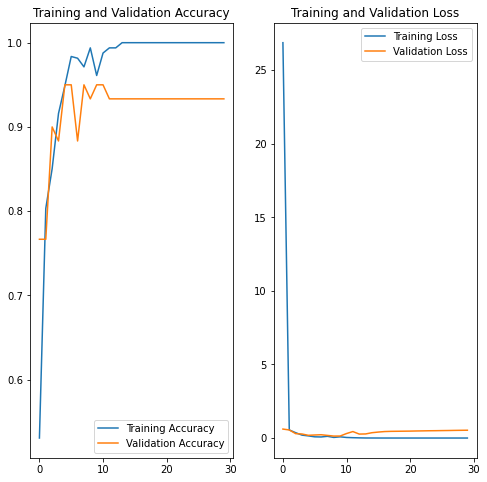

In [26]:
plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label = 'Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label = 'Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label = 'Training Loss')
plt.plot(range(EPOCHS), val_loss, label = 'Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()